<a href="https://colab.research.google.com/github/madrigaljose/madrigaljose/blob/main/20210710_Madrigal_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')##############################################

In [ ]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
data = pdr.get_data_yahoo('DE')#, start, end)
data = data[['High']]  
data.tail()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.63)
[*********************100%***********************]  1 of 1 completed


,High
Date,
2021-07-02,355.910004
2021-07-06,353.000000
2021-07-07,352.559998
2021-07-08,347.350006
2021-07-09,350.720001


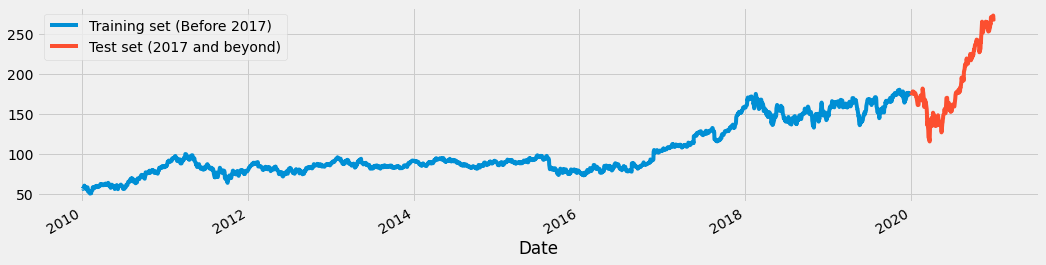

In [ ]:
# create train and test
data["High"]['2010':'2019'].plot(figsize=(16, 4), legend=True)
data["High"]['2020'].plot(figsize=(16, 4), legend=True)

# plot the data
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
#plt.title('Deere Stock')
#fig_path = os.path.join(pth, stock_name + '_train_test')

# save the data, pause, and close
#plt.savefig(fig_path)
#plt.pause(1)
#plt.close()

In [ ]:
# create training and test set
#training_set = data[:'2016'].iloc[:, 1:2].values
#test_set = data['2017':].iloc[:, 1:2].values
training_set=data[["High"]][:'2016']
test_set=data[["High"]]['2017':]


In [ ]:
training_set

,High
Date,
1972-06-01,2.682292
1972-06-02,2.734375
1972-06-05,2.723958
1972-06-06,2.729167
1972-06-07,2.677083
...,...
2016-12-23,103.309998
2016-12-27,104.120003
2016-12-28,104.330002


In [ ]:
test_set

,High
Date,
2017-01-03,104.769997
2017-01-04,106.500000
2017-01-05,106.250000
2017-01-06,106.750000
2017-01-09,106.309998
...,...
2021-07-02,355.910004
2021-07-06,353.000000
2021-07-07,352.559998


In [ ]:
# scale the data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# create training and test data
X_train = []
y_train = []
for i in range(60, 2768):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

total_data = pd.concat((data["High"][:'2016'], data["High"]['2017':]), axis=0)
inputs = total_data[len(total_data) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [ ]:
# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#def create_single_layer_small_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelA = Sequential()
RNNmodelA.add(SimpleRNN(6))
RNNmodelA.add(Dense(1))

RNNmodelA.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelA.fit(X_train, y_train, epochs=100, batch_size=150,verbose=0)

# Finalizing predictions
scaled_preds = RNNmodelA.predict(X_test)
RNNAtest_preds = sc.inverse_transform(scaled_preds)

In [ ]:
RNNmodelA.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 6)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNNAtest_preds

array([[76.2554  ],
       [76.412544],
       [77.53463 ],
       [77.82458 ],
       [77.74272 ],
       [77.675354],
       [77.13168 ],
       [77.06712 ],
       [77.19726 ],
       [77.234634],
       [77.42841 ],
       [77.160866],
       [77.26927 ],
       [77.59192 ],
       [78.220406],
       [78.260666],
       [78.68046 ],
       [78.46482 ],
       [78.35618 ],
       [78.185905],
       [78.005295],
       [78.04109 ],
       [78.31072 ],
       [78.24353 ],
       [78.53964 ],
       [78.60173 ],
       [78.84775 ],
       [78.69755 ],
       [79.42044 ],
       [80.106895],
       [80.16763 ],
       [78.98298 ],
       [78.97397 ],
       [79.578896],
       [80.26966 ],
       [78.997246],
       [79.293236],
       [78.547554],
       [78.98065 ],
       [79.44714 ],
       [80.16023 ],
       [80.145485],
       [79.77366 ],
       [79.71052 ],
       [79.70718 ],
       [79.82799 ],
       [79.83785 ],
       [79.390724],
       [79.3534  ],
       [79.34391 ],


In [ ]:
#def create_single_layer_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelB = Sequential()
RNNmodelB.add(SimpleRNN(32))
RNNmodelB.add(Dense(1))

RNNmodelB.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelB.fit(X_train, y_train, epochs=100, batch_size=150,verbose=1)

# Finalizing predictions
scaled_preds = RNNmodelB.predict(X_test)
RNNBtest_preds = sc.inverse_transform(scaled_preds)

Epoch 1/100
19/19 [==============================] - 2s 13ms/step - loss: 0.0011
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 9.3191e-05
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 8.2181e-05
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 3.2833e-05
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 5.3168e-05
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 7.6861e-05
Epoch 7/100
19/19 [==============================] - 0s 12ms/step - loss: 3.4022e-05
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 4.1971e-05
Epoch 9/100
19/19 [==============================] - 0s 12ms/step - loss: 1.5541e-05
Epoch 10/100
19/19 [==============================] - 0s 13ms/step - loss: 1.5906e-05
Epoch 11/100
19/19 [==============================] - 0s 12ms/step - loss: 6.4779e-05
Epoch 12/100
19/19 [==============================] - 0s 12ms/step 

In [ ]:
#def create_single_layer_small_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelC = Sequential()
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32))
RNNmodelC.add(Dense(1))

RNNmodelC.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelC.fit(X_train, y_train, epochs=100, batch_size=150,verbose=1)

# Finalizing predictions
scaled_preds = RNNmodelC.predict(X_test)
RNNCtest_preds = sc.inverse_transform(scaled_preds)

Epoch 1/100
19/19 [==============================] - 7s 49ms/step - loss: 0.2567
Epoch 2/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0096
Epoch 3/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0172
Epoch 4/100
19/19 [==============================] - 1s 54ms/step - loss: 0.0076
Epoch 5/100
19/19 [==============================] - 1s 58ms/step - loss: 0.0122
Epoch 6/100
19/19 [==============================] - 1s 50ms/step - loss: 0.0071
Epoch 7/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0078
Epoch 8/100
19/19 [==============================] - 1s 50ms/step - loss: 0.0049
Epoch 9/100
19/19 [==============================] - 1s 50ms/step - loss: 0.0039
Epoch 10/100
19/19 [==============================] - 1s 52ms/step - loss: 0.0031
Epoch 11/100
19/19 [==============================] - 1s 49ms/step - loss: 0.0044
Epoch 12/100
19/19 [==============================] - 1s 57ms/step - loss: 0.0032
Epoch 13/100
19/19 [=====

In [ ]:
RNNCtest_preds

array([[4.492945 ],
       [4.475874 ],
       [4.491382 ],
       [4.5179043],
       [4.51868  ],
       [4.49474  ],
       [4.4757333],
       [4.4771194],
       [4.493244 ],
       [4.506194 ],
       [4.497597 ],
       [4.478872 ],
       [4.4657145],
       [4.4722047],
       [4.487206 ],
       [4.4936657],
       [4.4801965],
       [4.463394 ],
       [4.4592853],
       [4.468999 ],
       [4.48165  ],
       [4.483579 ],
       [4.470867 ],
       [4.45782  ],
       [4.452465 ],
       [4.46282  ],
       [4.4732   ],
       [4.4740787],
       [4.462857 ],
       [4.4552126],
       [4.450438 ],
       [4.4514027],
       [4.457203 ],
       [4.4734316],
       [4.471716 ],
       [4.453399 ],
       [4.4325914],
       [4.4441495],
       [4.4696403],
       [4.4801292],
       [4.465061 ],
       [4.4369936],
       [4.4269743],
       [4.4433436],
       [4.4696465],
       [4.477742 ],
       [4.459377 ],
       [4.4338675],
       [4.42728  ],
       [4.445053 ],


In [ ]:
#def create_GRU_model(X_train, y_train, X_test, sc):
#    '''
#    create GRU model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01,decay=1e-7,momentum=0.9,nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
19/19 [==============================] - 12s 198ms/step - loss: 2.8276e-04
Epoch 2/50
19/19 [==============================] - 4s 194ms/step - loss: 1.1143e-04
Epoch 3/50
19/19 [==============================] - 4s 195ms/step - loss: 9.6890e-05
Epoch 4/50
19/19 [==============================] - 4s 194ms/step - loss: 9.6046e-05
Epoch 5/50
19/19 [==============================] - 4s 192ms/step - loss: 9.5259e-05
Epoch 6/50
19/19 [==============================] - 4s 193ms/step - loss: 9.3460e-05
Epoch 7/50
19/19 [==============================] - 4s 194ms/step - loss: 9.9819e-05
Epoch 8/50
19/19 [==============================] - 4s 195ms/step - loss: 9.4621e-05
Epoch 9/50
19/19 [==============================] - 4s 193ms/step - loss: 9.0952e-05
Epoch 10/50
19/19 [==============================] - 4s 195ms/step - loss: 9.5422e-05
Epoch 11/50
19/19 [==============================] - 4s 193ms/step - loss: 9.3816e-05
Epoch 12/50
19/19 [==============================] - 4s 194ms/

In [ ]:
#def create_GRU_with_drop_out_model(X_train, y_train, X_test, sc):
#    '''
#    create GRU model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''
# The GRU architecture
regressorGRUB = Sequential()
# First GRU layer with Dropout regularisation
regressorGRUB.add(GRU(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Second GRU layer
regressorGRUB.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Third GRU layer
regressorGRUB.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Fourth GRU layer
regressorGRUB.add(GRU(units=50, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# The output layer
regressorGRUB.add(Dense(units=1))
# Compiling the RNN
regressorGRUB.compile(optimizer=SGD(lr=0.01,decay=1e-7,momentum=0.9,nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRUB.fit(X_train, y_train, epochs=50, batch_size=150)
GRUB_predicted_stock_price = regressorGRUB.predict(X_test)
GRUB_predicted_stock_price = sc.inverse_transform(GRUB_predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
19/19 [==============================] - 12s 208ms/step - loss: 4.5820e-04
Epoch 2/50
19/19 [==============================] - 4s 209ms/step - loss: 1.8900e-04
Epoch 3/50
19/19 [==============================] - 4s 215ms/step - loss: 1.6229e-04
Epoch 4/50
19/19 [==============================] - 4s 215ms/step - loss: 1.6158e-04
Epoch 5/50
19/19 [==============================] - 4s 210ms/step - loss: 1.6142e-04
Epoch 6/50
19/19 [==============================] - 4s 208ms/step - loss: 1.6301e-04
Epoch 7/50
19/19 [==============================] - 4s 211ms/step - loss: 1.5728e-04
Epoch 8/50
19/19 [==============================] - 4s 212ms/step - loss: 1.5533e-04
Epoch 9/50
19/19 [==============================] - 4s 208ms/step - loss: 1.5492e-04
Epoch 10/50
19/19 [==============================] - 4s 211ms/step - loss: 1.5400e-04
Epoch 11/50
19/19 [==============================] - 4s 209ms/step - loss: 1.4728e-04
Epoch 12/50
19/19 [==============================] - 4s 210ms/

In [ ]:
#def create_prophet_results(all_data,
#                           final_train_idx=2768,
#                           pred_periods=250):
#    '''
#    create prophet model trained on first 2768 rows by
#    default and predicts on last 250 rows
#    '''
# Pull train data
#    train_data = all_data[:final_train_idx].reset_index()[['Date', 'High']]
#    train_data.columns = ['ds', 'y']
#
#    # Create and fit model
#    prophet_model = Prophet()
#    prophet_model.fit(train_data)#
#
#    # Provide predictions
#    test_dates = prophet_model.make_future_dataframe(periods=pred_periods)
#    forecast_prices = prophet_model.predict(test_dates)
#
#    return forecast_prices


NameError: ignored

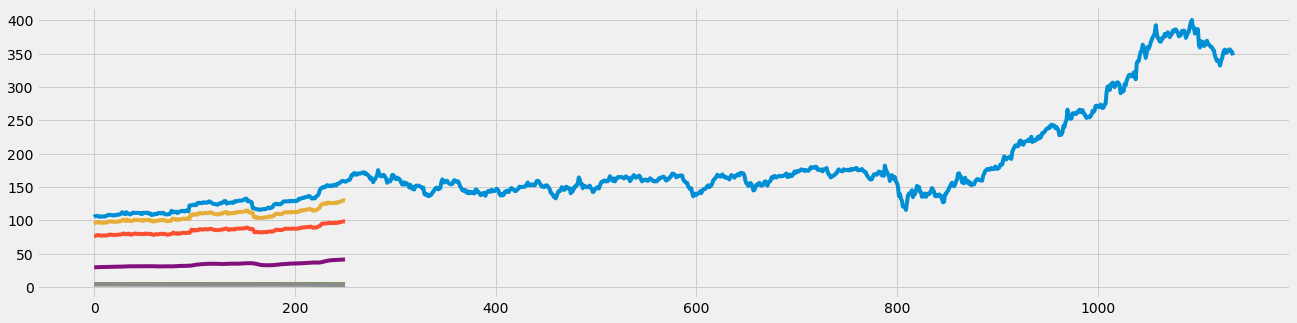

In [ ]:
plt.figure(figsize=(20, 5))
#plt.plot(yearly_prophet_preds.reset_index()['yhat'].values[-250:], label='prophet yearly predictions')
plt.plot(data["High"]['2017':].values[:-1], label='actual values')
plt.plot(RNNAtest_preds, label='Single Layer Small RNN values')
plt.plot(RNNBtest_preds, label='Single Layer RNN values')
plt.plot(RNNCtest_preds, label='RNN values')
plt.plot(GRUB_predicted_stock_price, label='GRU with dropout values')
plt.plot(GRU_predicted_stock_price, label='GRU values')
plt.title('{} Predictions from Prophet vs. Actual'.format(stock_name))
plt.legend()